# Visualize Results


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image, ImageFile

In [24]:
snoq = glob.glob('/Volumes/CatBreen/CV4ecology/snoq/**/*')
olympex = glob.glob('/Volumes/CatBreen/CV4ecology/olympex/**/*')
scandcam = glob.glob('/Volumes/CatBreen/CV4ecology/scandcam/**/*')

all_paths = snoq+olympex+scandcam
all_files = [file.split('/')[-1] for file in all_paths]
paths = pd.DataFrame({'all_paths':all_paths,'all_files':all_files})
paths.head()

all_paths                all_files
0  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...  2014_12_02_12_00_00.jpg
1  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...  2014_10_18_13_01_00.jpg
2  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...  2014_10_22_12_00_00.jpg
3  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_11...  2014_11_27_13_01_00.jpg
4  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...  2014_12_11_08_00_00.jpg

## load result csvs for the best experiments

In [25]:
#results = pd.read_csv('/Users/cmbreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_3classes_seqSliding/figs/results.csv')
class2_none = pd.read_csv('/Users/cmbreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_2classes_None/resultsTEST.csv')
class2_none = class2_none[['filenames', 'trueLabels','predictedLabels', 'confidences']]
class2_none.head()


filenames  trueLabels  predictedLabels  confidences
0    896_20181227 (51).JPG           1                1     0.918138
1   874_20190111 (611).JPG           1                0     0.094495
2  982_20181206 (4906).JPG           1                1     0.584488
3     657_20190330 (8).JPG           1                1     0.999630
4  1119_20190530 (420).JPG           1                0     0.002408

## Find places that they match!


In [35]:
def match(results, paths):
### remove matches 
    indices = []
    for idx, trueLabel in enumerate(results['trueLabels']):
        if trueLabel == results['predictedLabels'][idx]: indices.append(idx)

    #results[results['confidences'] > 0.90]
    mismatch = results.drop(indices)

    mismatch = results.drop(indices)
    df = mismatch.sort_values(by=['confidences'], ascending=False).reset_index()    #[mismatch['confidences'] > 0.95].reset_index()
    df = df.rename(columns={"Unnamed: 0": "index"})

    df1 = df.merge(paths, left_on='filenames', right_on="all_files")
    
    return df1


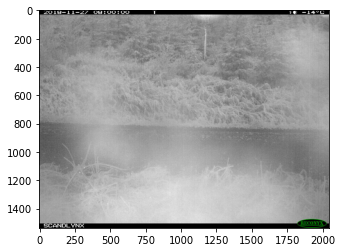

In [36]:
#mismatch['index'][0]
matchFiles = match(class2_none, paths)
matchFiles.head()
top1 = Image.open(mismatchFiles['all_paths'][4])
plt.imshow(top1)



In [57]:
matchFiles[18:23]

index               filenames  trueLabels  predictedLabels  confidences  \
18   2913   710_20190120 (47).JPG           0                1     0.986780   
19   2127  520_20190415 (340).JPG           0                1     0.986142   
20   2125  520_20190415 (338).JPG           0                1     0.984137   
21   2029   937_20190119 (65).JPG           0                1     0.982936   
22   2124  520_20190415 (337).JPG           0                1     0.982079   

                                            all_paths               all_files  
18  /Volumes/CatBreen/CV4ecology/scandcam/None/710...   710_20190120 (47).JPG  
19  /Volumes/CatBreen/CV4ecology/scandcam/None/520...  520_20190415 (340).JPG  
20  /Volumes/CatBreen/CV4ecology/scandcam/None/520...  520_20190415 (338).JPG  
21  /Volumes/CatBreen/CV4ecology/scandcam/None/937...   937_20190119 (65).JPG  
22  /Volumes/CatBreen/CV4ecology/scandcam/None/520...  520_20190415 (337).JPG

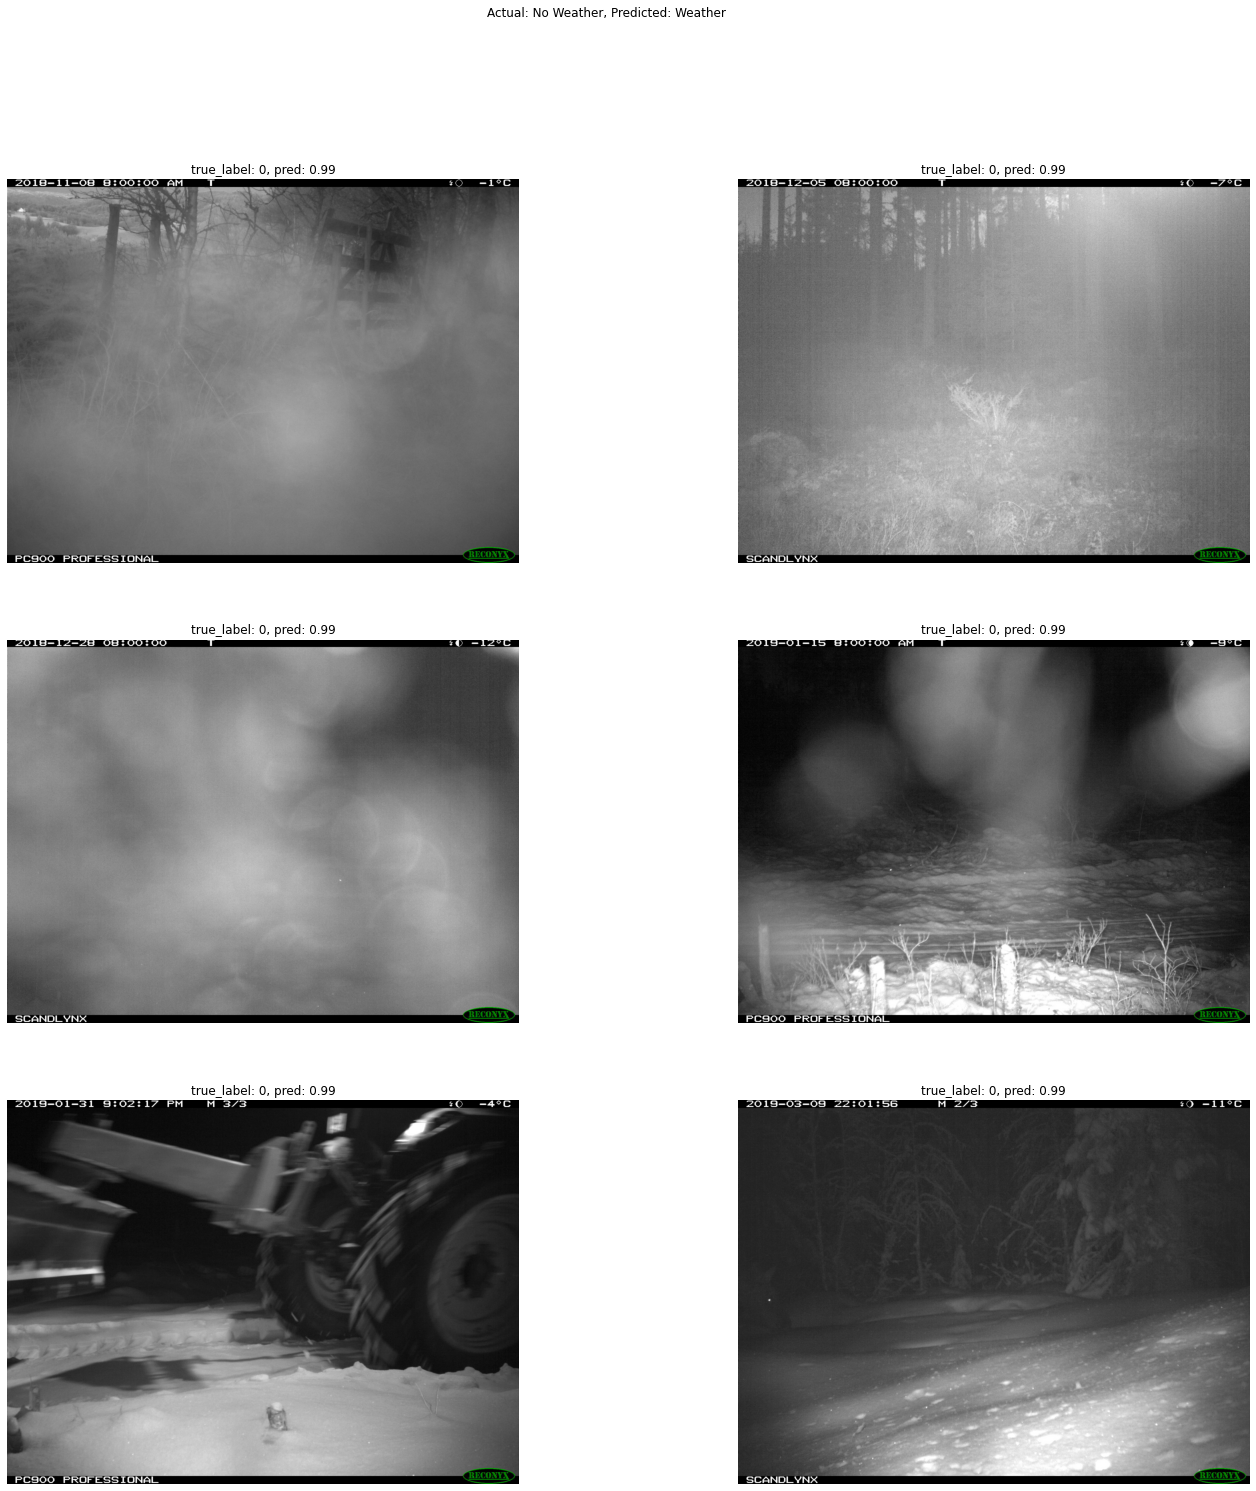

In [58]:
#mismatch['index'][0]
top1 = Image.open(matchFiles['all_paths'][24])
top2 = Image.open(matchFiles['all_paths'][25])
top3 = Image.open(matchFiles['all_paths'][26])
top4 = Image.open(matchFiles['all_paths'][27])
top5 = Image.open(matchFiles['all_paths'][28])
top6 = Image.open(matchFiles['all_paths'][29])

fig, axs = plt.subplots(3, 2, figsize=(24, 24))
fig.suptitle('Actual: No Weather, Predicted: Weather')
axs[0, 0].imshow(top1)
axs[0, 0].axis('off')
axs[0, 0].title.set_text('true_label: 0, pred: 0.99')
axs[0, 1].imshow(top2)
axs[0, 1].axis('off')
axs[0, 1].title.set_text('true_label: 0, pred: 0.99')
axs[1, 0].imshow(top3)
axs[1, 0].axis('off')
axs[1, 0].title.set_text('true_label: 0, pred: 0.99')
axs[1, 1].imshow(top4)
axs[1, 1].axis('off')
axs[1, 1].title.set_text('true_label: 0, pred: 0.99')
axs[2, 0].imshow(top5)
axs[2, 0].axis('off')
axs[2, 0].title.set_text('true_label: 0, pred: 0.99')
axs[2, 1].imshow(top6)
axs[2, 1].axis('off')
axs[2, 1].title.set_text('true_label: 0, pred: 0.99')

## Find places that they don't match

We will do this by indices

In [38]:
def mismatchFiles(results, paths):
### remove matches 
    indices = []
    for idx, trueLabel in enumerate(results['trueLabels']):
        if trueLabel == results['predictedLabels'][idx]: indices.append(idx)

    #results[results['confidences'] > 0.90]
    mismatch = results.drop(indices)

    mismatch = results.drop(indices)
    df = mismatch.sort_values(by=['confidences'], ascending=False).reset_index()    #[mismatch['confidences'] > 0.95].reset_index()
    df = df.rename(columns={"Unnamed: 0": "index"})

    df1 = df.merge(paths, left_on='filenames', right_on="all_files")
    

    return df1

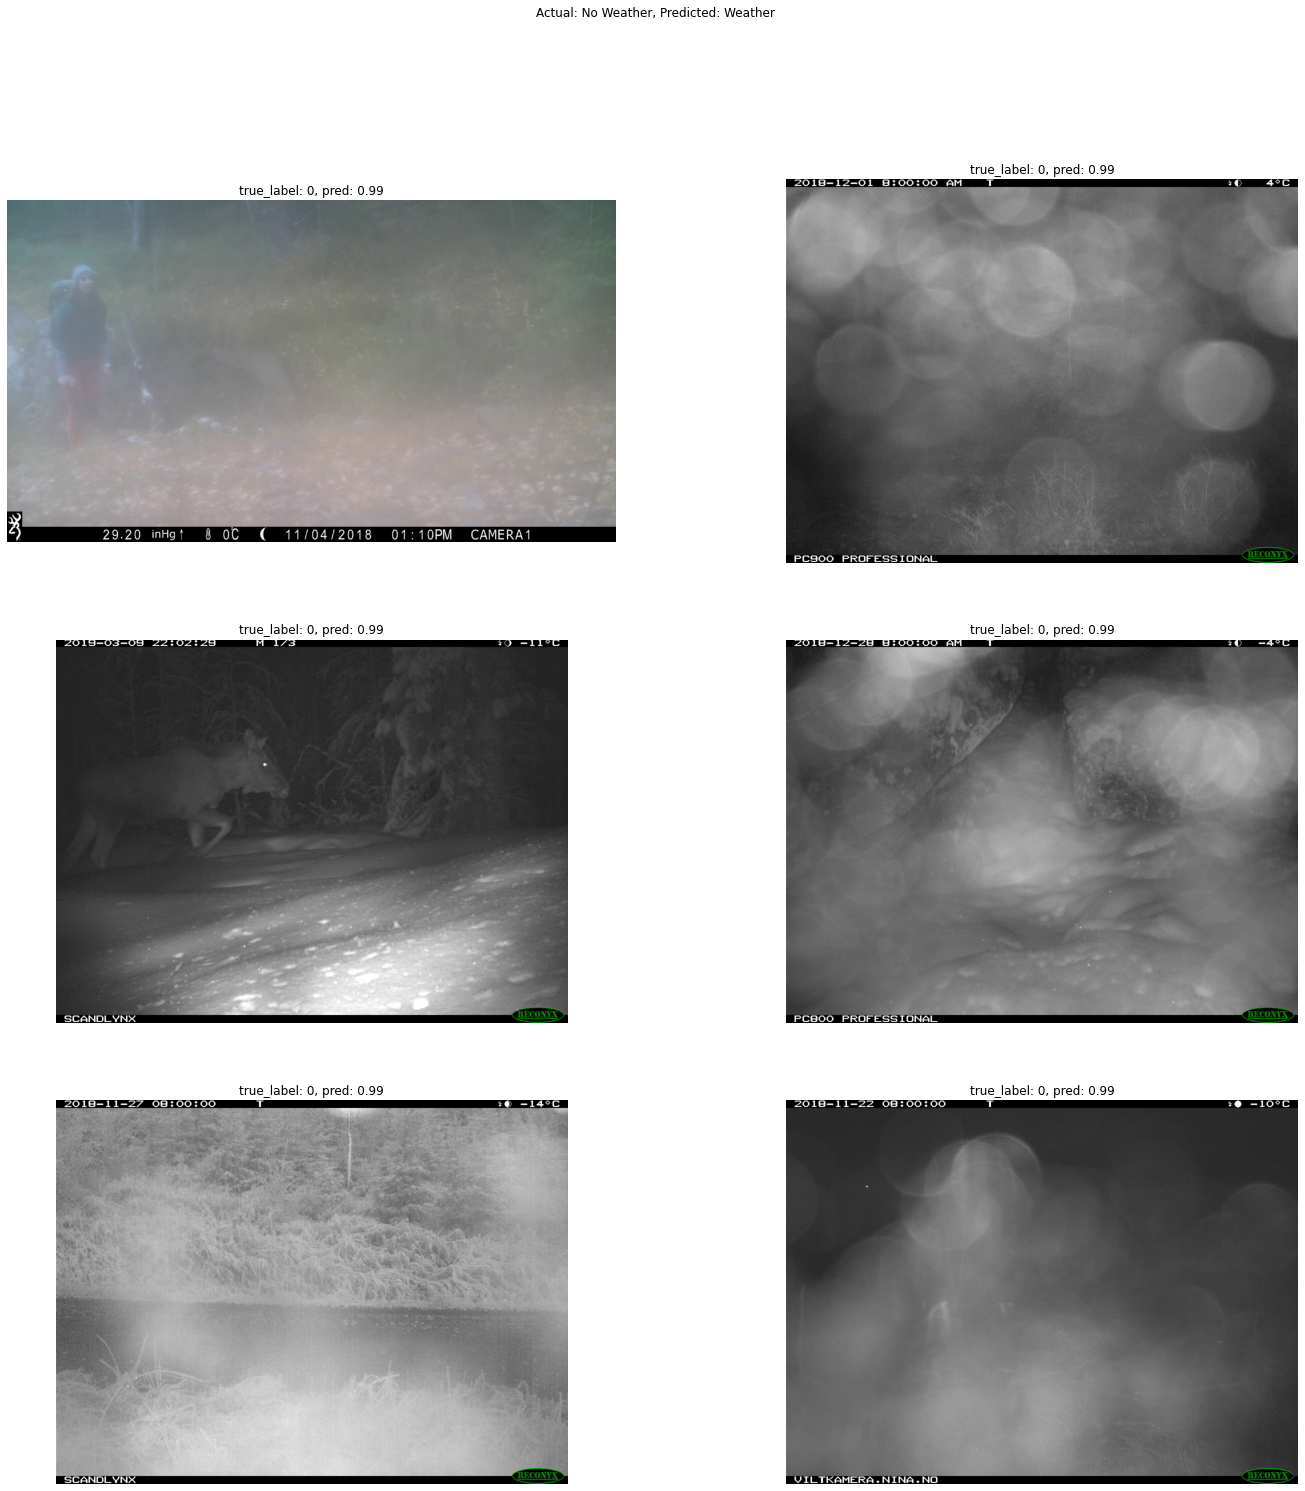

In [39]:
#mismatch['index'][0]

mismatch = mismatchFiles(class2_none,paths)  ## 68 files that are rain that are NOT rain
mismatch.head()

top1 = Image.open(mismatch['all_paths'][1])
top2 = Image.open(mismatch['all_paths'][13])
top3 = Image.open(mismatch['all_paths'][17])
top4 = Image.open(mismatch['all_paths'][3])
top5 = Image.open(mismatch['all_paths'][4])
top6 = Image.open(mismatch['all_paths'][5])

fig, axs = plt.subplots(3, 2, figsize=(24, 24))
fig.suptitle('Actual: No Weather, Predicted: Weather')
axs[0, 0].imshow(top1)
axs[0, 0].axis('off')
axs[0, 0].title.set_text('true_label: 0, pred: 0.99')
axs[0, 1].imshow(top2)
axs[0, 1].axis('off')
axs[0, 1].title.set_text('true_label: 0, pred: 0.99')
axs[1, 0].imshow(top3)
axs[1, 0].axis('off')
axs[1, 0].title.set_text('true_label: 0, pred: 0.99')
axs[1, 1].imshow(top4)
axs[1, 1].axis('off')
axs[1, 1].title.set_text('true_label: 0, pred: 0.99')
axs[2, 0].imshow(top5)
axs[2, 0].axis('off')
axs[2, 0].title.set_text('true_label: 0, pred: 0.99')
axs[2, 1].imshow(top6)
axs[2, 1].axis('off')
axs[2, 1].title.set_text('true_label: 0, pred: 0.99')



## Visualize Results

In [176]:
mismatch.tail()

index                filenames  trueLabels  predictedLabels  \
281    180  1120_20190723 (579).JPG           1                0   
282     36  1119_20190530 (429).JPG           1                0   
283     23  1521_20190604 (118).JPG           1                0   
284    212   1374_20190606 (10).JPG           1                0   
285     14   334_20181015 (379).JPG           1                0   

      confidences                                          all_paths  \
281  8.110264e-06  /Volumes/CatBreen/CV4ecology/scandcam/Snow/112...   
282  6.192612e-06  /Volumes/CatBreen/CV4ecology/scandcam/Rain/111...   
283  2.705877e-06  /Volumes/CatBreen/CV4ecology/scandcam/Rain/152...   
284  2.125648e-06  /Volumes/CatBreen/CV4ecology/scandcam/Snow/137...   
285  8.998664e-07  /Volumes/CatBreen/CV4ecology/scandcam/Rain/334...   

                   all_files  
281  1120_20190723 (579).JPG  
282  1119_20190530 (429).JPG  
283  1521_20190604 (118).JPG  
284   1374_20190606 (10).JPG  
285   334_20181015 (379).JPG

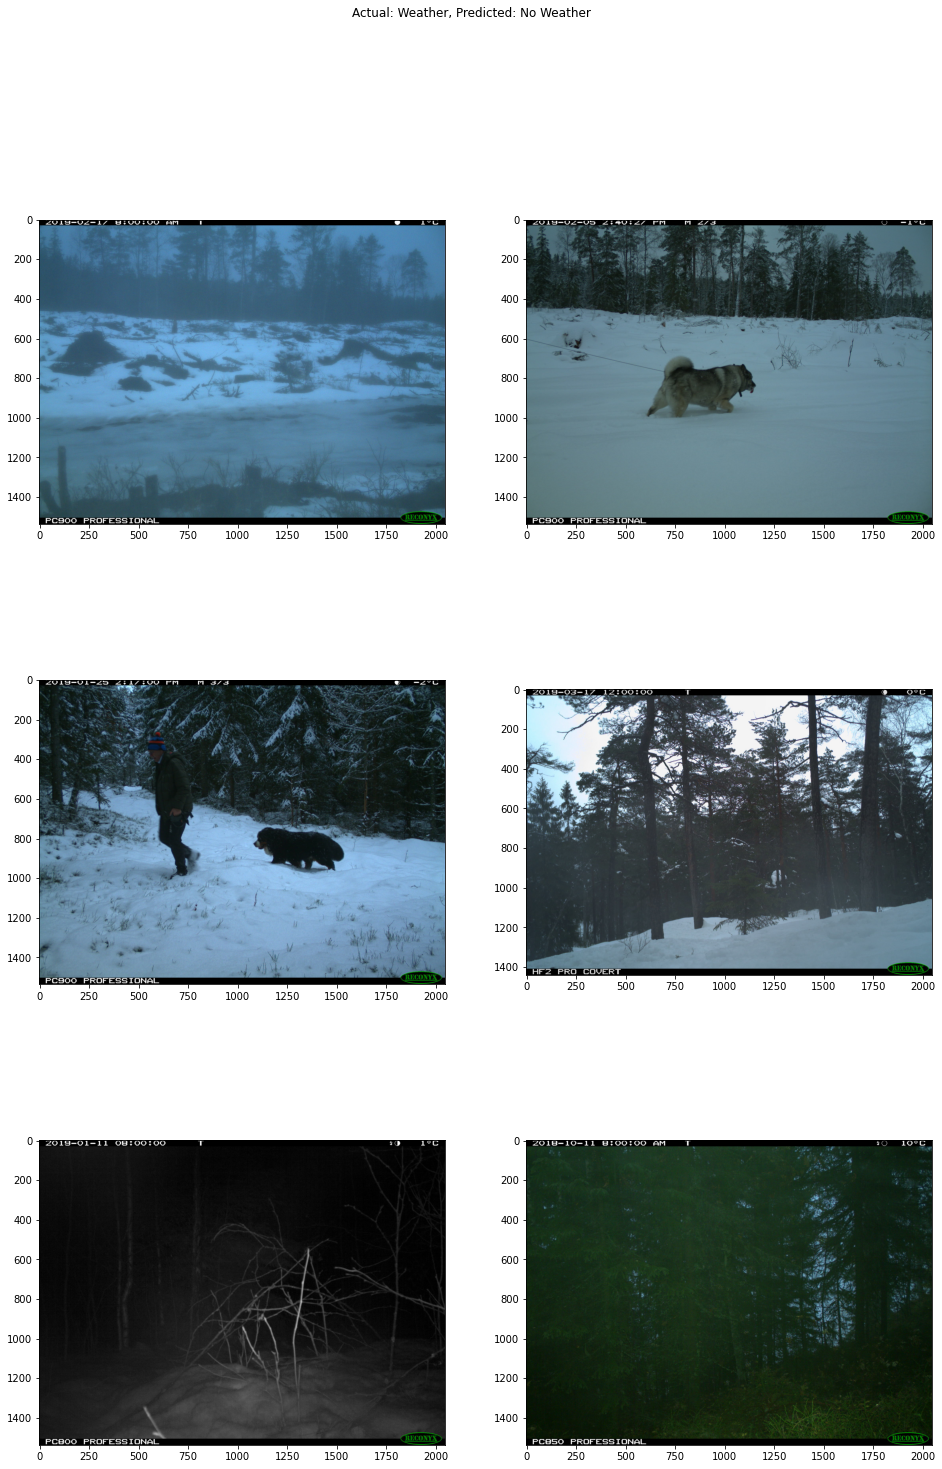

In [198]:
mismatch.tail()
#mismatch['index'][0]
bottom1 = Image.open(mismatch['all_paths'][len(mismatch)-6])
bottom2 = Image.open(mismatch['all_paths'][len(mismatch)-5])
bottom3 = Image.open(mismatch['all_paths'][len(mismatch)-4])
bottom4 = Image.open(mismatch['all_paths'][len(mismatch)-3])
bottom5 = Image.open(mismatch['all_paths'][len(mismatch)-2])
bottom6 = Image.open(mismatch['all_paths'][len(mismatch)-1])

fig, axs = plt.subplots(3, 2, figsize=(16, 24))
fig.suptitle('Actual: Weather, Predicted: No Weather')
axs[0, 0].imshow(bottom1)
axs[0, 1].imshow(bottom2)
axs[1, 0].imshow(bottom3)
axs[1, 1].imshow(bottom4)
axs[2, 0].imshow(bottom5)
axs[2, 1].imshow(bottom6)


In [221]:
class3_none = pd.read_csv('/Users/cmbreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_3classes/figs/figs/resultsTEST.csv')## 68 files that are rain that are NOT rain
class3_none = class3_none[['filenames', 'trueLabels','predictedLabels', 'confidences0', 'confidences1', 'confidences2']]
indices = []
for idx, trueLabel in enumerate(class3_none['trueLabels']):
    if trueLabel == class3_none['predictedLabels'][idx]: indices.append(idx)

mismatch3 = class3_none.drop(indices)
dfrain = mismatch3.sort_values(by=['confidences1'], ascending=False).reset_index()    #[mismatch['confidences'] > 0.95].reset_index()
#df = df.rename(columns={"Unnamed: 0": "index"})
dfrain.head()
mismatch3rain = dfrain.merge(paths, left_on='filenames', right_on="all_files")
mismatch3rain

    

index                filenames  trueLabels  predictedLabels  \
0     1492   1123_20181203 (55).JPG           0                1   
1     3188    892_20190109 (29).JPG           0                1   
2     3135   870_20181201 (178).JPG           0                1   
3      178  1120_20190723 (265).JPG           2                1   
4     3134   870_20181201 (177).JPG           0                1   
..     ...                      ...         ...              ...   
293     23  1521_20190604 (118).JPG           1                0   
294     42  1119_20190530 (435).JPG           1                0   
295     36  1119_20190530 (429).JPG           1                0   
296     41  1119_20190530 (434).JPG           1                0   
297    180  1120_20190723 (579).JPG           2                0   

     confidences0  confidences1  confidences2  \
0        0.084146      0.859935      0.055919   
1        0.092683      0.857986      0.049331   
2        0.064507      0.840136      0.095357   
3        0.096365      0.832624      0.071010   
4        0.150733      0.770078      0.079189   
..            ...           ...           ...   
293      0.999424      0.000276      0.000299   
294      0.999118      0.000209      0.000673   
295      0.999306      0.000175      0.000519   
296      0.999280      0.000158      0.000562   
297      0.999899      0.000042      0.000059   

                                             all_paths  \
0    /Volumes/CatBreen/CV4ecology/scandcam/None/112...   
1    /Volumes/CatBreen/CV4ecology/scandcam/None/892...   
2    /Volumes/CatBreen/CV4ecology/scandcam/None/870...   
3    /Volumes/CatBreen/CV4ecology/scandcam/Snow/112...   
4    /Volumes/CatBreen/CV4ecology/scandcam/None/870...   
..                                                 ...   
293  /Volumes/CatBreen/CV4ecology/scandcam/Rain/152...   
294  /Volumes/CatBreen/CV4ecology/scandcam/Rain/111...   
295  /Volumes/CatBreen/CV4ecology/scandcam/Rain/111...   
296  /Volumes/CatBreen/CV4ecology/scandcam/Rain/111...   
297  /Volumes/CatBreen/CV4ecology/scandcam/Snow/112...   

                   all_files  
0     1123_20181203 (55).JPG  
1      892_20190109 (29).JPG  
2     870_20181201 (178).JPG  
3    1120_20190723 (265).JPG  
4     870_20181201 (177).JPG  
..                       ...  
293  1521_20190604 (118).JPG  
294  1119_20190530 (435).JPG  
295  1119_20190530 (429).JPG  
296  1119_20190530 (434).JPG  
297  1120_20190723 (579).JPG  

[298 rows x 9 columns]

(-0.5, 2047.5, 1535.5, -0.5)

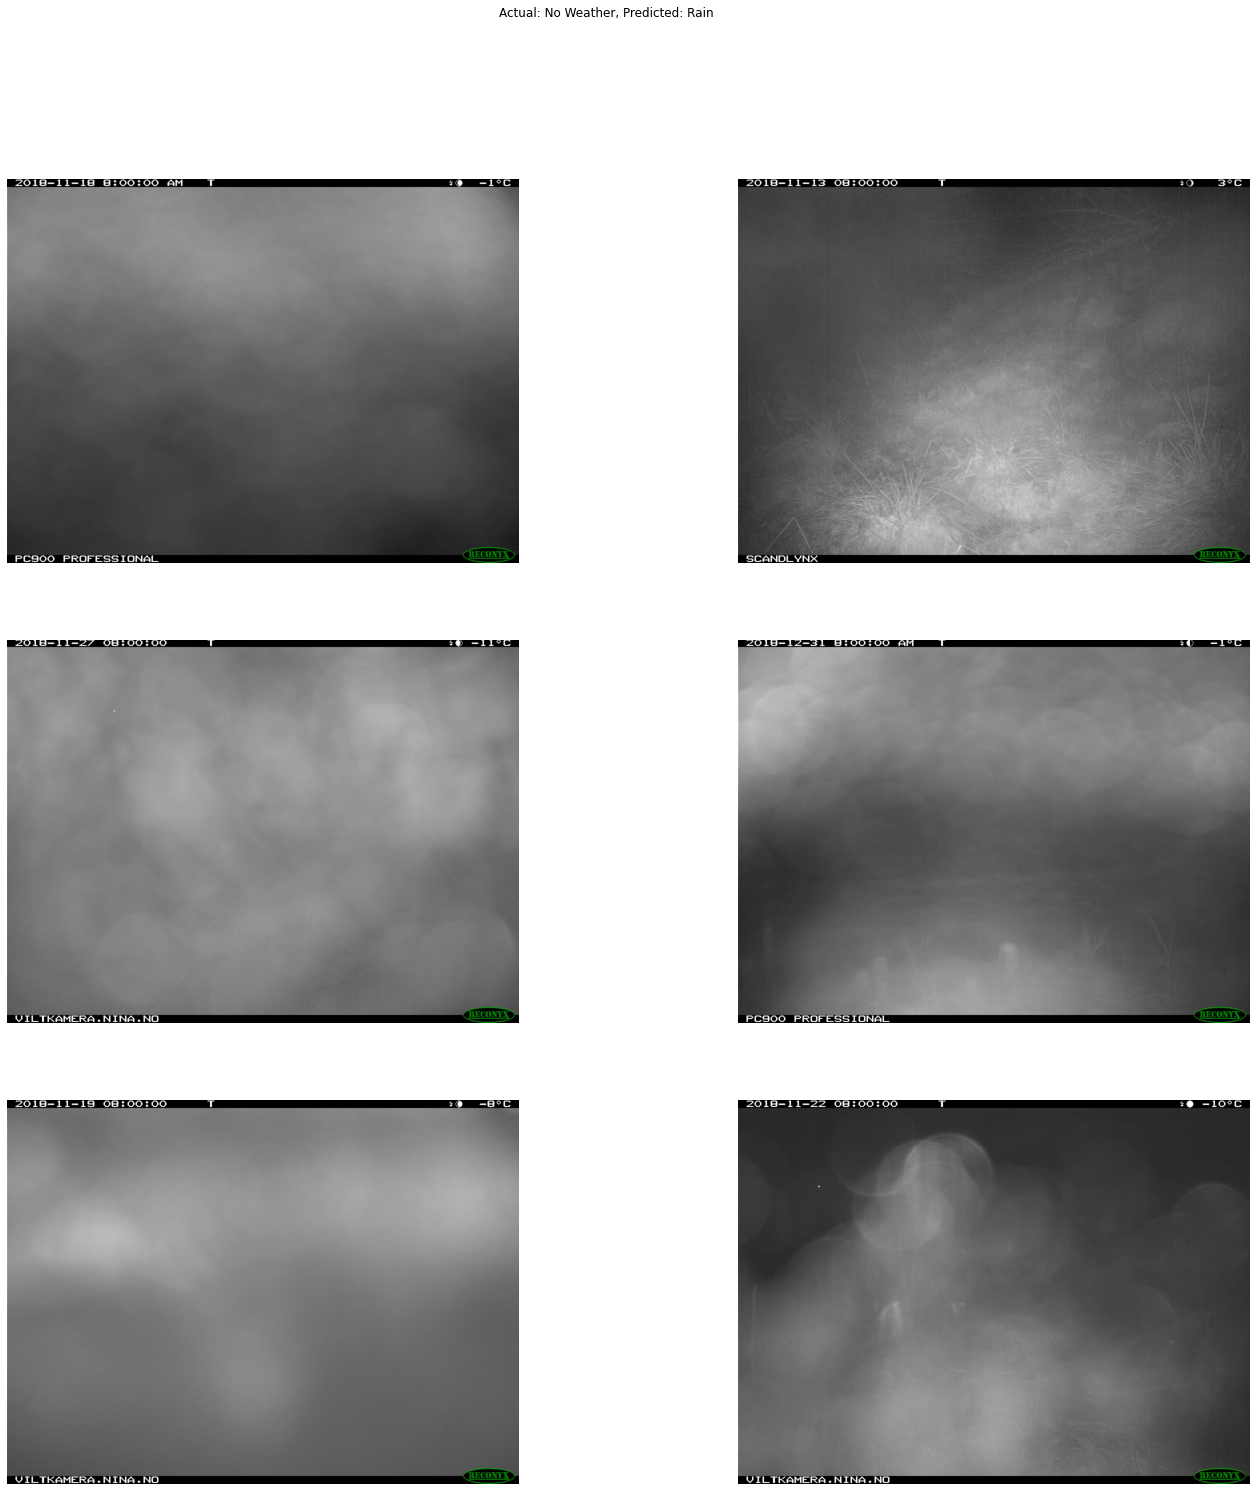

In [222]:
#mismatch['index'][0]
top1 = Image.open(mismatch3rain['all_paths'][1])
top2 = Image.open(mismatch3rain['all_paths'][13])
top3 = Image.open(mismatch3rain['all_paths'][17])
top4 = Image.open(mismatch3rain['all_paths'][3])
top5 = Image.open(mismatch3rain['all_paths'][4])
top6 = Image.open(mismatch3rain['all_paths'][5])

fig, axs = plt.subplots(3, 2, figsize=(24, 24))
fig.suptitle('Actual: No Weather, Predicted: Rain')
axs[0, 0].imshow(top1)
axs[0, 0].axis('off')
axs[0, 1].imshow(top2)
axs[0, 1].axis('off')
axs[1, 0].imshow(top3)
axs[1, 0].axis('off')
axs[1, 1].imshow(top4)
axs[1, 1].axis('off')
axs[2, 0].imshow(top5)
axs[2, 0].axis('off')
axs[2, 1].imshow(top6)
axs[2, 1].axis('off')

In [223]:
mismatch3 = class3_none.drop(indices)
dfsnow = mismatch3.sort_values(by=['confidences2'], ascending=False).reset_index()    #[mismatch['confidences'] > 0.95].reset_index()
#df = df.rename(columns={"Unnamed: 0": "index"})
dfrain.head()
mismatch3snow = dfsnow.merge(paths, left_on='filenames', right_on="all_files")
mismatch3snow


index                filenames  trueLabels  predictedLabels  \
0     1362  1120_20190723 (554).JPG           0                2   
1     1874  1253_20190217 (153).JPG           0                2   
2     2119   520_20190415 (330).JPG           0                2   
3     2125   520_20190415 (338).JPG           0                2   
4     2126   520_20190415 (339).JPG           0                2   
..     ...                      ...         ...              ...   
293     36  1119_20190530 (429).JPG           1                0   
294    162  1120_20190723 (578).JPG           2                0   
295     14   334_20181015 (379).JPG           1                0   
296     23  1521_20190604 (118).JPG           1                0   
297    180  1120_20190723 (579).JPG           2                0   

     confidences0  confidences1  confidences2  \
0        0.336583      0.115221      0.548196   
1        0.240874      0.217122      0.542003   
2        0.362560      0.143000      0.494440   
3        0.361592      0.146046      0.492362   
4        0.419283      0.113567      0.467150   
..            ...           ...           ...   
293      0.999306      0.000175      0.000519   
294      0.999278      0.000322      0.000400   
295      0.999305      0.000362      0.000333   
296      0.999424      0.000276      0.000299   
297      0.999899      0.000042      0.000059   

                                             all_paths  \
0    /Volumes/CatBreen/CV4ecology/scandcam/None/112...   
1    /Volumes/CatBreen/CV4ecology/scandcam/None/125...   
2    /Volumes/CatBreen/CV4ecology/scandcam/None/520...   
3    /Volumes/CatBreen/CV4ecology/scandcam/None/520...   
4    /Volumes/CatBreen/CV4ecology/scandcam/None/520...   
..                                                 ...   
293  /Volumes/CatBreen/CV4ecology/scandcam/Rain/111...   
294  /Volumes/CatBreen/CV4ecology/scandcam/Snow/112...   
295  /Volumes/CatBreen/CV4ecology/scandcam/Rain/334...   
296  /Volumes/CatBreen/CV4ecology/scandcam/Rain/152...   
297  /Volumes/CatBreen/CV4ecology/scandcam/Snow/112...   

                   all_files  
0    1120_20190723 (554).JPG  
1    1253_20190217 (153).JPG  
2     520_20190415 (330).JPG  
3     520_20190415 (338).JPG  
4     520_20190415 (339).JPG  
..                       ...  
293  1119_20190530 (429).JPG  
294  1120_20190723 (578).JPG  
295   334_20181015 (379).JPG  
296  1521_20190604 (118).JPG  
297  1120_20190723 (579).JPG  

[298 rows x 9 columns]

In [1]:
#mismatch['index'][0]
top1 = Image.open(mismatch3snow['all_paths'][0])
top2 = Image.open(mismatch3snow['all_paths'][1])
top3 = Image.open(mismatch3snow['all_paths'][2])
top4 = Image.open(mismatch3snow['all_paths'][3])
top5 = Image.open(mismatch3snow['all_paths'][4])
top6 = Image.open(mismatch3snow['all_paths'][5])

fig, axs = plt.subplots(3, 2, figsize=(24, 24))
fig.suptitle('Actual: No Weather, Predicted: Snow')
axs[0, 0].imshow(top1)
axs[0, 0].axis('off')
axs[0, 1].imshow(top2)
axs[0, 1].axis('off')
axs[1, 0].imshow(top3)
axs[1, 0].axis('off')
axs[1, 1].imshow(top4)
axs[1, 1].axis('off')
axs[2, 0].imshow(top5)
axs[2, 0].axis('off')
axs[2, 1].imshow(top6)
axs[2, 1].axis('off')

NameError: name 'Image' is not defined